# Avaliação Final

NOME: 


E-MAIL: 

Esta é a A.F. de Álgebra Linear e Teoria da Informação de 1s2023.



INSTRUÇÕES:

1. Faça todas as questões
1. Salve o notebook
1. Envie o notebook salvo no Blackboard

IMPORTANTE:

* Você pode consultar qualquer material ou IA, mas não qualquer colega ou pessoa humana, presente ou não na prova.
* O envio da prova será fechado às 17h45. Aqueles que não enviarem o material até este horário ficarão com zero.
* A prova vale um total de 10 pontos. As questões 1, 2, 3 e 4 têm peso igual a 2.5.
* Os conceitos F, E, D, C, B, A serão mapeados para 0, 2, 4, 6, 8 e 10.
* Para todas as questões, usaremos a rubrica que segue anexa a esta prova. Há uma rubrica para a justificativa e uma rubrica para o código. A nota da questão é a menor entre as notas da justificativa e do código.


# Exercício 1

A matriz $X$ é:

$$
X = \begin{bmatrix} 1.5 & 0 \\ 2 & 0.5 \end{bmatrix}
$$

O vetor-coluna $v$ é:
$$
v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

$v$ é um auto-vetor de $X$? Justifique sua resposta!

$$
\begin{bmatrix} 1.5 & 0 \\ 2 & 0.5 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \lambda \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 1.5 \\ 2.5 \end{bmatrix}
$$

Como não existe $\lambda$ tal que $v = \lambda v$, então $v$ não é um auto-vetor de $X$.

In [73]:
# Isso não é a resposta do exercício - mas mostra alguns caminhos para encontrar a resposta.
import numpy as np
X = np.array([[1.5, 0], 
              [2, 0.5]])

print("X")
print(X)
v, w = np.linalg.eig(X)
print("v")
print(v)
print("w")
print(w)

V = np.array([[1, 1]]).T
print("X @ V")
print(X @ V)

def verifica_se_eh_autovetor(X, V):
    mult = X @ V
    # Se o vetor for um autovetor, deve ter um lambda tal que X @ V = lambda * V
    alpha = 0.00001
    while True:
        if np.allclose(mult, alpha * V):
            print("Autovetor encontrado com lambda = ", alpha)
            return alpha
        alpha += 0.00001
        if alpha > 10:
            print("Não é autovetor")
            return None

print(verifica_se_eh_autovetor(X, V))

X
[[1.5 0. ]
 [2.  0.5]]
v
[0.5 1.5]
w
[[0.         0.4472136 ]
 [1.         0.89442719]]
X @ V
[[1.5]
 [2.5]]
Não é autovetor
None


In [59]:
import numpy as np

# Definindo a matriz X e o vetor v
X = np.array([[1.5, 0],
              [2, 0.5]])
v = np.array([[1],
              [1]])

# Calculando Xv
Xv = np.dot(X, v)

# Calculando os autovalores e autovetores de X
autovalores, autovetores = np.linalg.eig(X)

# Inicializando uma variável para armazenar o autovetor correspondente a v, se encontrado
autovetor_correspondente = None

# Iterando sobre todos os autovalores para encontrar o autovetor correspondente a v
for i in range(len(autovalores)):
    # Verificando se X vezes o autovetor atual é igual ao autovalor vezes o autovetor atual
    if np.allclose(np.dot(X, autovetores[:, i]), autovalores[i] * autovetores[:, i]):
        # Se a condição for verdadeira, o autovetor atual é o autovetor correspondente a v
        autovetor_correspondente = autovetores[:, i]
        break

# Se v é um autovetor, imprime o autovalor correspondente
if np.allclose(autovetor_correspondente, v):
    # Se autovetor_correspondente é igual a v, então v é um autovetor
    autovalor_correspondente = autovalores[i]
    print("O vetor v é um autovetor de X.")
    print(f"Autovalor correspondente: {autovalor_correspondente}")
else:
    # Caso contrário, v não é um autovetor
    print("O vetor v não é um autovetor de X.")

O vetor v não é um autovetor de X.


# Exercício 2

Um possível modelo para o controle de doenças é o modelo SI (Suscetível - Infectado). Nesse modelo, uma pessoa pode estar ou suscetível ou infectada. Uma pessoa suscetível não tem a doença, mas pode contraí-la a qualquer momento. Uma pessoa infectada tem a doença, mas pode se recuperar.

A cada semana, uma pessoa suscetível tem uma probabilidade de continuar saudável e uma probabilidade de ficar infectada. Da mesma forma, uma pessoa que está infectada tem uma probabilidade de continuar infectada e uma probabilidade de se recuperar, voltando a estar suscetível.

Esse modelo foi aplicado para a doença (fictícia!) algelinite, que faz a pessoa doente ficar azul e cheia de bolinhas amarelas. Uma pessoa com algelininte não consegue trabalhar, nem estudar, nem se divertir. A pessoa com algelinite precisa de um leito de hospital até sua recuperação completa.

Através de pesquisas, cientistas determinaram que:, a cada semana:

* A probabilidade de uma pessoa suscetível se infectar com algelininte é $0.01$ (e, por consequência, a probabilidade de simplesmente continuar suscetível é $0.99$).
* A probabilidade de uma pessoa infectada se recuperar (se estiver num leito hospitalar) é $0.2$ (e, por consequência, a probabilidade de continuar doente é $0.8$).

Na cidade de São Paulo há 10 milhões de pessoas, inicialmente saudáveis. Quantos leitos de hospital são tipicamente necessários para controlar a algelininte na capital paulista ao longo de um tempo longo? Justifique sua resposta!

[[0.99 0.2 ]
 [0.01 0.8 ]]


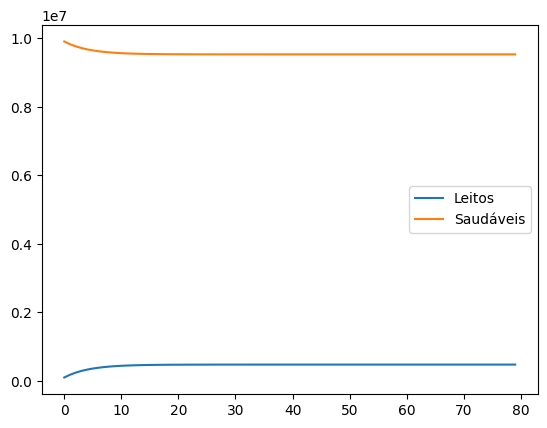

[[9523809.52688525]
 [ 476190.47311475]]


In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a matriz de transição A e o vetor de estado inicial x
A = np.array([[0.99, 0.2],
              [0.01, 0.8]])
x = np.array([[10_000_000],
              [0]])

leitos = []
saudaveis = []

print(A)
# um passo: x = A @ x
# implemente 52*50 passos seguidos!
for _ in range(80): # 52 semanas * 50 anos
    x = A@x
    leitos.append(x[1])
    saudaveis.append(x[0])

plt.figure()
plt.plot(leitos, label='Leitos')
plt.plot(saudaveis, label='Saudáveis')
plt.legend()
plt.show()

# Número de pessoas por condição(suscetível/infectado) = # total de pessoas * P(pessoa por condição)
print(x)

[[0.99 0.2 ]
 [0.01 0.8 ]]


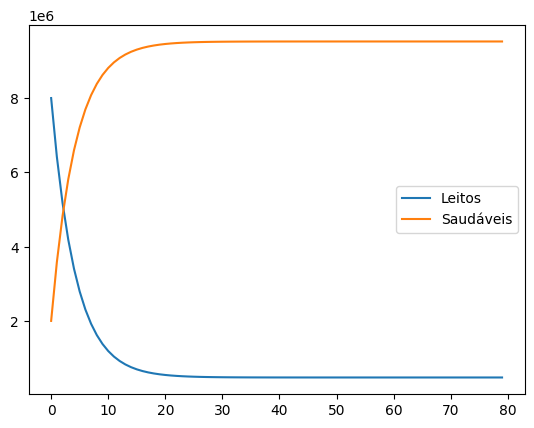

[[9523809.46229495]
 [ 476190.53770505]]


In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a matriz de transição A e o vetor de estado inicial x
A = np.array([[0.99, 0.2],
              [0.01, 0.8]])
x = np.array([[0],
              [10_000_000]])

leitos = []
saudaveis = []

print(A)
# um passo: x = A @ x
# implemente 52*50 passos seguidos!
for _ in range(80): # 52 semanas * 50 anos
    x = A@x
    leitos.append(x[1])
    saudaveis.append(x[0])

plt.figure()
plt.plot(leitos, label='Leitos')
plt.plot(saudaveis, label='Saudáveis')
plt.legend()
plt.show()

# Número de pessoas por condição(suscetível/infectado) = # total de pessoas * P(pessoa por condição)
print(x)

In [88]:
import numpy as np

# População inicial
x = np.array([[10_000_000], [0]])

# Matriz de transição das categorias suscetível (S) para infectada (I)
A = np.array([[0.99, 0.2], 
              [0.01, 0.8]])
print(A)

# Simulação de 100 iterações
for _ in range(52*50): # 52 semanas * 50 anos
    x = A @ x

# O número de leitos necessários é aproximadamente igual ao número máximo de infectados
leitos_necessarios = int(np.ceil(max(x[1])))
print(f"Número de leitos de hospital necessários: {leitos_necessarios}")

[[0.99 0.2 ]
 [0.01 0.8 ]]
Número de leitos de hospital necessários: 476191


In [64]:
populacao = np.array([[9523809.52380952],
                      [476190.47619048]])

A = np.array([[0.99, 0.2], 
              [0.01, 0.8]])

saudaveis = 9523809.52380952 * 0.99 + 0.2 * 476190.47619048
infectadas = 0.01 * 9523809.52380952 + 0.8 * 476190.47619048
print(saudaveis, infectadas)
print()

9523809.52380952 476190.47619047924



# Exercício 3

Um grupo de cientistas de dados coletou dados sobre os hábitos de estudo de alunos de uma sala de aula do ensino médio. Os dados coletados, para cada aluno, são a sua nota na prova final de Filosofia e o tempo que cada aluno passou estudando.

Os dados do tempo de estudo ($t$) e da nota da na prova ($y$) estão abaixo.

Embora os alunos tenham reclamado que a prova estava difícil, a coordenação da escola argumentou que está claro que, quanto maior o tempo de estudo, maior foi a nota na prova. Ainda, uma das diretrizes da escola diz que as provas são planejadas para que, com 4h de estudo, seja absolutamente factível tirar nota 8 na prova. A coordenção da escola diz que a nota, inclusive, pode ser predita com um modelo linear do tipo $y=at+b$.

Como representante da equipe de ciência de dados:

1. Argumente sobre se o modelo proposto pela coordenação é adequado para prever as notas dos alunos, e, se for o caso, proponha um modelo diferente,
1. Usando `autograd`, encontre os parâmetros do modelo que permite prever a nota com base no tempo de estudo,
1. Mostre uma figura com os pontos medidos sobrepostos a uma linha que evidencie as predições do modelo,
1. Usando os parâmetros do modelo que você escolheu, decida se é factível tirar nota 8 na prova com 4h de estudo.

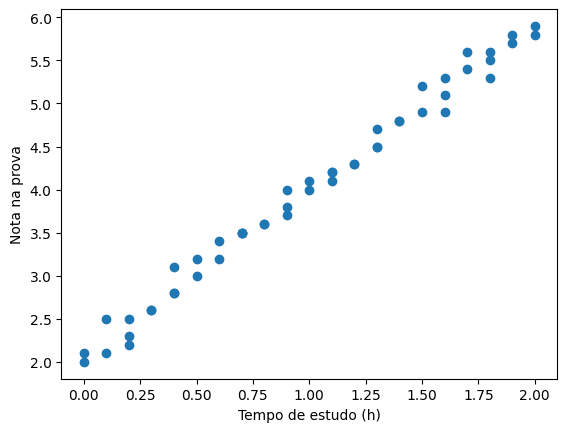

In [65]:
import matplotlib.pyplot as plt

t = [0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9, 1.0, 1.0, 1.1, 1.1, 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.4, 1.4, 1.5, 1.5, 1.6, 1.6, 1.6, 1.7, 1.7, 1.8, 1.8, 1.8, 1.9, 1.9, 2.0, 2.0]
y = [2.0, 2.1, 2.1, 2.5, 2.2, 2.3, 2.5, 2.6, 2.6, 2.8, 2.8, 3.1, 3.0, 3.2, 3.2, 3.4, 3.5, 3.5, 3.5, 3.6, 3.6, 3.7, 4.0, 3.8, 4.0, 4.1, 4.2, 4.2, 4.1, 4.3, 4.3, 4.5, 4.7, 4.5, 4.8, 4.8, 4.9, 5.2, 4.9, 5.1, 5.3, 5.4, 5.6, 5.5, 5.3, 5.6, 5.8, 5.7, 5.8, 5.9]

plt.figure()
plt.scatter(t,y)
plt.xlabel('Tempo de estudo (h)')
plt.ylabel('Nota na prova')
plt.show()

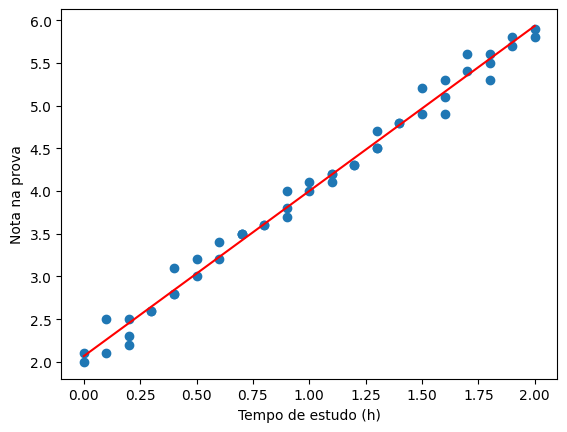

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as np_
from autograd import grad

tempos = [0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9, 1.0, 1.0, 1.1, 1.1, 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.4, 1.4, 1.5, 1.5, 1.6, 1.6, 1.6, 1.7, 1.7, 1.8, 1.8, 1.8, 1.9, 1.9, 2.0, 2.0]
notas = [2.0, 2.1, 2.1, 2.5, 2.2, 2.3, 2.5, 2.6, 2.6, 2.8, 2.8, 3.1, 3.0, 3.2, 3.2, 3.4, 3.5, 3.5, 3.5, 3.6, 3.6, 3.7, 4.0, 3.8, 4.0, 4.1, 4.2, 4.2, 4.1, 4.3, 4.3, 4.5, 4.7, 4.5, 4.8, 4.8, 4.9, 5.2, 4.9, 5.1, 5.3, 5.4, 5.6, 5.5, 5.3, 5.6, 5.8, 5.7, 5.8, 5.9]

tempos_ = np_.array(tempos)
notas_ = np_.array(notas)

def loss ( parametros ):
    A,B,t,n = parametros
    estimativa = A*t + B
    erro = np_.mean((estimativa - n)**2)
    return erro

dloss = grad(loss)


A = 0.0
B = 0.0
alpha = 10**-3


for i in range(10000):
    g = dloss( (A,B,tempos_,notas_) )
    A -= alpha * g[0]
    B -= alpha * g[1]

funcao_final_estimada = A * tempos_ + B

plt.figure()
plt.scatter(t,y)
plt.plot(tempos_, funcao_final_estimada, color='red')
plt.xlabel('Tempo de estudo (h)')
plt.ylabel('Nota na prova')
plt.show()

In [74]:
# Descobrir qual seria a nota se o tempo de estudo fosse 4 horas
nota_estimada = A * 4 + B
print(f"A nota estimada para 4 horas de estudo é {nota_estimada}")

A nota estimada para 4 horas de estudo é 9.7960771112733


In [66]:
def eqm( parametros ): # Essa função calcula o erro quadrático médio entre as medições e um modelo
    medidas_x, medidas_y, coef_angular_modelo, coef_linear_modelo = parametros
    y_reta = coef_angular_modelo * medidas_x + coef_linear_modelo # Calcula a reta
    dists = (medidas_y - y_reta)**2 # Calcula o quadrado das diferenças
    eqm_ = sum(dists)/len(medidas_x) # Calcula o erro quadrático médio

    return eqm_

def deqm_da(medidas_x, medidas_y, coef_angular_tentativa): # Essa função calcula o erro quadrático médio entre as medições e um modelo
    # Complete esta função
    dEQM = sum(medidas_x * (coef_angular_tentativa * medidas_x - medidas_y)) * (2 / len(medidas_x))
    return dEQM

def melhorar_modelo(medidas_x, medidas_y, alpha, a_atual):
    a_novo = a_atual - alpha * deqm_da(medidas_x, medidas_y, a_atual)
    return a_novo

# Um grupo de cientistas de dados coletou dados sobre os hábitos de estudo de alunos de uma sala de aula do ensino médio. Os dados coletados, para cada aluno, são a sua nota na prova final de Filosofia e o tempo que cada aluno passou estudando.

# Os dados do tempo de estudo ($t$) e da nota da na prova ($y$) estão abaixo.

# Embora os alunos tenham reclamado que a prova estava difícil, a coordenação da escola argumentou que está claro que, quanto maior o tempo de estudo, maior foi a nota na prova. Ainda, uma das diretrizes da escola diz que as provas são planejadas para que, com 4h de estudo, seja absolutamente factível tirar nota 8 na prova. A coordenção da escola diz que a nota, inclusive, pode ser predita com um modelo linear do tipo $y=at+b$.

# Como representante da equipe de ciência de dados:

# 1. Argumente sobre se o modelo proposto pela coordenação é adequado para prever as notas dos alunos, e, se for o caso, proponha um modelo diferente,
# 2. Usando `autograd`, encontre os parâmetros do modelo que permite prever a nota com base no tempo de estudo,
# 3. Mostre uma figura com os pontos medidos sobrepostos a uma linha que evidencie as predições do modelo,
# 4. Usando os parâmetros do modelo que você escolheu, decida se é factível tirar nota 8 na prova com 4h de estudo.

import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt


# Dados de tempo de estudo e nota na prova
t = [0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9, 1.0, 1.0, 1.1, 1.1, 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.4, 1.4, 1.5, 1.5, 1.6, 1.6, 1.6, 1.7, 1.7, 1.8, 1.8, 1.8, 1.9, 1.9, 2.0, 2.0]
y = [2.0, 2.1, 2.1, 2.5, 2.2, 2.3, 2.5, 2.6, 2.6, 2.8, 2.8, 3.1, 3.0, 3.2, 3.2, 3.4, 3.5, 3.5, 3.5, 3.6, 3.6, 3.7, 4.0, 3.8, 4.0, 4.1, 4.2, 4.2, 4.1, 4.3, 4.3, 4.5, 4.7, 4.5, 4.8, 4.8, 4.9, 5.2, 4.9, 5.1, 5.3, 5.4, 5.6, 5.5, 5.3, 5.6, 5.8, 5.7, 5.8, 5.9] 

# Função de erro quadrático médio

def eqm( parametros ): # Essa função calcula o erro quadrático médio entre as medições e um modelo
    medidas_x, medidas_y, coef_angular_modelo, coef_linear_modelo = parametros
    # Complete esta função
    y_reta = coef_angular_modelo * medidas_x + coef_linear_modelo
    dists = (medidas_y - y_reta)**2
    eqm_ = sum(dists)/len(medidas_x)

    return eqm_

# Derivada do erro quadrático médio

def deqm_da(medidas_x, medidas_y, coef_angular_tentativa): # Essa função calcula o erro quadrático médio entre as medições e um modelo
    # Complete esta função
    dEQM = sum(medidas_x * (coef_angular_tentativa * medidas_x - medidas_y)) * (2 / len(medidas_x))
    return dEQM

# Melhorando o modelo

def melhorar_modelo(medidas_x, medidas_y, alpha, a_atual):
    a_novo = a_atual - alpha * deqm_da(medidas_x, medidas_y, a_atual)
    return a_novo

# Inicializando os coeficientes do modelo

a = 0.0
b = 0.0

# Parâmetros do modelo

parametros = [t, y, a, b]

# Otimizando o modelo

for i in range(1000):
    a = melhorar_modelo(t, y, 0.01, a)
    parametros = [t, y, a, b]

# Plotando os resultados

plt.figure()
plt.scatter(t, y)
plt.plot(t, a*t + b, color='red')
plt.xlabel('Tempo de estudo (h)')
plt.ylabel('Nota na prova')
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

# Exercício 4

Após realizar a compressão de uma sequência com o Código de Huffman, obtemos a seguinte árvore:

<img src="arvore.png" />




1. Qual é a codificação da sequência: `ABBCBAAACD`?

0 10 10 110 10 0 0 0 110 111

2. Qual é a sequência cuja codificação é: `0 10 110 111 111 110 10 0`?

A B C D D C B A